In [1]:
#Importing essential libraries for project
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
#Base directory where 4 classes of images are stored
base_dir = "data"  

#skin aging categories
classes = ["Wrinkles", "Dark Spots", "Puffy Eyes", "Clear Skin"]

In [2]:
def build_df_from_folders(root, class_names, exts=(".jpg", ".jpeg", ".png")):
    paths, labs = [], []
    for c in class_names:
        p = os.path.join(root, c)
        if not os.path.isdir(p):
            print("Missing folder:", p)
            continue
        for f in os.listdir(p):
            if f.lower().endswith(exts):
                paths.append(os.path.join(p, f))
                labs.append(c)
    return pd.DataFrame({"filepath": paths, "label": labs})

In [3]:
#Building the dataframe
df = build_df_from_folders(base_dir, classes)

print("Total images:", len(df))
print(df["label"].value_counts())
df.head()



Total images: 1203
label
Dark Spots    303
Wrinkles      300
Puffy Eyes    300
Clear Skin    300
Name: count, dtype: int64


,filepath,label
0,data\Wrinkles\1.jpg,Wrinkles
1,data\Wrinkles\10.jpg,Wrinkles
2,data\Wrinkles\100.jpg,Wrinkles
3,data\Wrinkles\101.jpg,Wrinkles
4,data\Wrinkles\102.jpg,Wrinkles


In [4]:
df.to_csv("Module1&2_df.csv", index=False)
print("Saved Module1&2_df")


Saved Module1&2_df


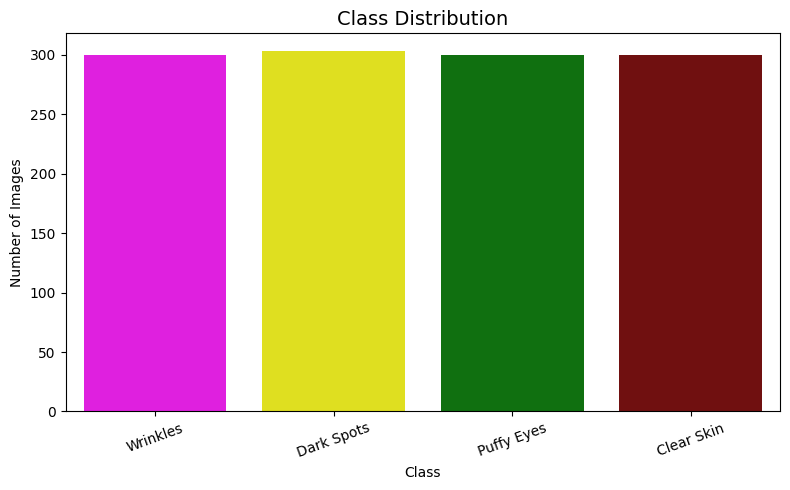

In [5]:
# Plotting how many images are present in each class
plt.figure(figsize=(8,5))

colors = ["magenta", "yellow", "green", "maroon"]

sns.countplot(
    data=df,
    x="label",
    hue="label",          
    palette=colors,
    legend=False          
)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



In [6]:
!pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#Import libraries for Module 2

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

#ImageDataGenerator for image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [ ]:
IMG_SIZE = 224
images = []
labels_list = []

for i, row in df.iterrows():
    img_path = row["filepath"]
    label = row["label"]

    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0   # normalize
    images.append(img_array)
    labels_list.append(label)

images = np.array(images)
print("Processed images shape:", images.shape)


In [ ]:
#using ImageDataGenerator to create modified images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


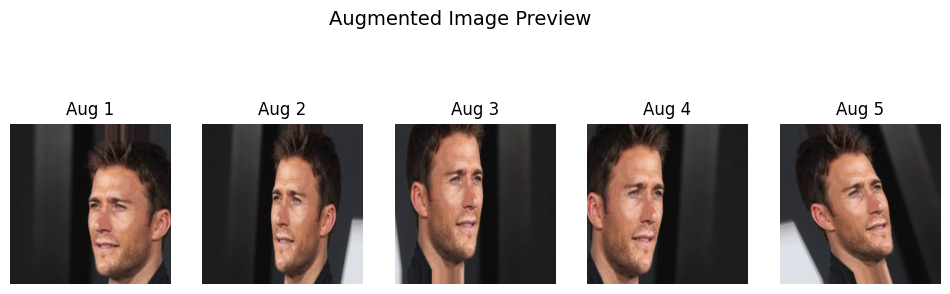

In [10]:
import random

random_index = random.randrange(len(images))
selected_image = images[random_index]

#adding extra dimension for ImageDataGenerator
image_array = np.expand_dims(selected_image, axis=0)
# We Generate 5 augmented images
augmented_batch = [next(datagen.flow(image_array))[0] for _ in range(5)]

plt.figure(figsize=(12, 4))
for i, img in enumerate(augmented_batch):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Aug {i+1}")

plt.suptitle("Augmented Image Preview", fontsize=14)
plt.show()


In [11]:
label_map = {
    "Clear Skin": 0,
    "Dark Spots": 1,
    "Puffy Eyes": 2,
    "Wrinkles": 3
}

df["label_id"] = df["label"].map(label_map)

labels_numeric = df["label_id"].values
labels_onehot = to_categorical(labels_numeric, num_classes=4)

print("One-hot encoded shape:", labels_onehot.shape)
print(labels_onehot[:5])


One-hot encoded shape: (1203, 4)
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    images,
    labels_onehot,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Training shape: (962, 256, 256, 3)
Validation shape: (241, 256, 256, 3)
